In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import scipy.stats as stats
import os
from scipy import stats
from matplotlib.offsetbox import AnchoredText
import matplotlib.patches as mpl_patches
from scipy.stats import spearmanr
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker
from matplotlib import gridspec

In [2]:
df=pd.read_table('FigS26.csv',sep='\t')
df.head()

,Accession,Area (cm2),Greenness,RelativeChlorophyll,NRAMP1copy,Experiment
0,F1-3,13.796386,1.543789,34.538224,2.696935,Exp1
1,F10-1-3,11.072591,1.472574,26.285904,1.857687,Exp1
2,F10-10-101,6.346727,1.453890,26.239505,3.178430,Exp1
3,F10-11-1,2.890480,1.427535,15.744587,1.789628,Exp1
4,F10-11-3,2.332850,1.390660,23.376049,2.695423,Exp1


In [3]:
Exp1=df.loc[df['Experiment'] == 'Exp1']
Exp2=df.loc[df['Experiment'] == 'Exp2']

In [4]:
PhotoSynQ2=Exp2.dropna()
PhotoSynQ2.shape[0]

31

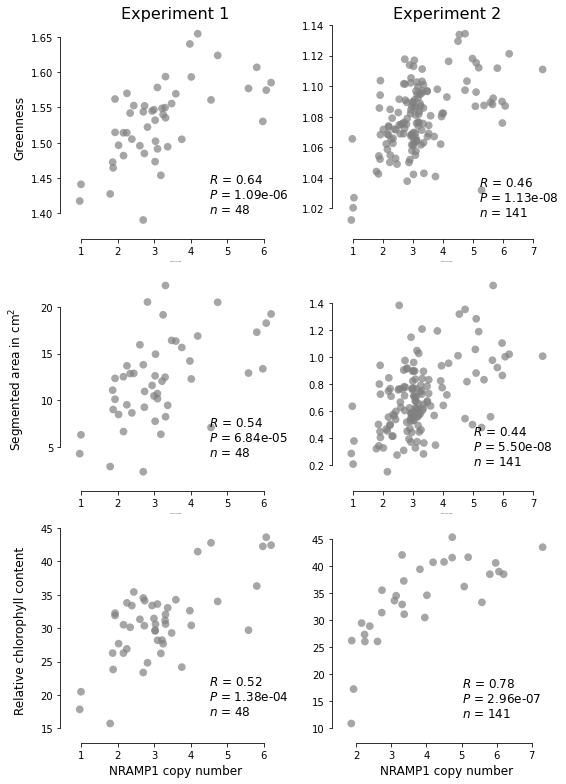

In [6]:
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker
fig,axes = plt.subplots(3,2,figsize=(8,11))
####First experiment
#Fig 1
corr_Green_Red_20191007=stats.spearmanr(Exp1['NRAMP1copy'], Exp1['Greenness'])

sns.scatterplot(x='NRAMP1copy',
                y='Greenness',
                color='grey',
                edgecolor='none',
                marker='o',
                s=60,
                alpha=0.7,
                data=Exp1,
                ax=axes[0,0])
axes[0,0].text(4.5, 1.40, '$\itR$ = {:.2f}\n$P$ = {:.2e}\n$n$ = {}'.format(corr_Green_Red_20191007[0],
                                                                       corr_Green_Red_20191007[1],
                                                                       Exp1.shape[0]), fontsize=12)
axes[0,0].set_ylabel('Greenness',fontsize=12)
axes[0,0].set_xlabel('NRAMP1 copy number',fontsize=0)
axes[0,0].set_title('Experiment 1',fontsize=16)

#Fig 2
corr_Area_20191007=stats.spearmanr(Exp1['NRAMP1copy'], Exp1['Area (cm2)'])

sns.scatterplot(x='NRAMP1copy',
                y='Area (cm2)',
                color='grey',
                edgecolor='none',
                marker='o',
                s=60,
                alpha=0.7,
                data=Exp1,
                ax=axes[1,0])
axes[1,0].text(4.5, 4, '$\itR$ = {:.2f}\n$P$ = {:.2e}\n$n$ = {}'.format(corr_Area_20191007[0],
                                                                    corr_Area_20191007[1],
                                                                    Exp1.shape[0]), fontsize=12)
axes[1,0].set_ylabel('Segmented area in cm$^2$',fontsize=12)
axes[1,0].set_xlabel('NRAMP1 copy number',fontsize=0)

#Fig 3
corr_Chloro_photosynqResults_1=stats.spearmanr(Exp1['NRAMP1copy'], Exp1['RelativeChlorophyll'])
sns.scatterplot(x='NRAMP1copy',
                y='RelativeChlorophyll',
                color='grey',
                edgecolor='none',
                marker='o',
                s=60,
                alpha=0.7,
                data=Exp1,
                ax=axes[2,0])
axes[2,0].text(4.5, 17, '$\itR$ = {:.2f}\n$P$ = {:.2e}\n$n$ = {}'.format(corr_Chloro_photosynqResults_1[0],
                                                                     corr_Chloro_photosynqResults_1[1],
                                                                     Exp1.shape[0]), fontsize=12)
axes[2,0].set_ylabel('Relative chlorophyll content',fontsize=12)
axes[2,0].set_xlabel('NRAMP1 copy number',fontsize=12)

####Second experiment
#Fig 1
corr_Green_Red_20201210=stats.spearmanr(Exp2['NRAMP1copy'], Exp2['Greenness'])
sns.scatterplot(x='NRAMP1copy',
                y='Greenness',
                color='grey',
                edgecolor='none',
                marker='o',
                s=60,
                alpha=0.7,
                data=Exp2,
                ax=axes[0,1])
axes[0,1].xaxis.set_major_locator(ticker.MultipleLocator(1))

axes[0,1].text(5.2, 1.015, '$\itR$ = {:.2f}\n$P$ = {:.2e}\n$n$ = {}'.format(corr_Green_Red_20201210[0],
                                                                         corr_Green_Red_20201210[1],
                                                                         Exp2.shape[0]), fontsize=12)
# axes[0,1].set_ylabel('Greenness',fontsize=12)
axes[0,1].set_ylabel('',fontsize=12)
axes[0,1].set_xlabel('NRAMP1 copy number',fontsize=0)
axes[0,1].set_title('Experiment 2',fontsize=16)

#Fig 2
corr_Area_20201210=stats.spearmanr(Exp2['NRAMP1copy'], Exp2['Area (cm2)'])
sns.scatterplot(x='NRAMP1copy',
                y='Area (cm2)',
                color='grey',
                edgecolor='none',
                marker='o',
                s=60,
                alpha=0.7,
                data=Exp2,
                ax=axes[1,1])

axes[1,1].xaxis.set_major_locator(ticker.MultipleLocator(1))

axes[1,1].text(5, 0.2, '$\itR$ = {:.2f}\n$P$ = {:.2e}\n$n$ = {}'.format(corr_Area_20201210[0],
                                                                  corr_Area_20201210[1],
                                                                  Exp2.shape[0]), fontsize=12)
# axes[1,1].set_ylabel('Segmented area in cm$^2$',fontsize=12)
axes[1,1].set_ylabel('',fontsize=12)
axes[1,1].set_xlabel('NRAMP1 copy number',fontsize=0)

#Fig 3
corr_Chloro_multispeQ=stats.spearmanr(PhotoSynQ2['NRAMP1copy'], PhotoSynQ2['RelativeChlorophyll'])
sns.scatterplot(x='NRAMP1copy',
                y='RelativeChlorophyll',
                color='grey',
                edgecolor='none',
                marker='o',
                s=60,
                alpha=0.7,
                data=Exp2,
                ax=axes[2,1])

axes[2,1].xaxis.set_major_locator(ticker.MultipleLocator(1))


axes[2,1].text(5, 12, '$\itR$ = {:.2f}\n$P$ = {:.2e}\n$n$ = {}'.format(corr_Chloro_multispeQ[0],
                                                                 corr_Chloro_multispeQ[1],
                                                                 Exp2.shape[0]), fontsize=12)
# axes[2,1].set_ylabel('Relative chlorophyll content',fontsize=12)
axes[2,1].set_ylabel('',fontsize=12)
axes[2,1].set_xlabel('NRAMP1 copy number',fontsize=12)
fig.align_ylabels(axes[:, ])
sns.despine(trim=True,offset=10)
plt.tight_layout()
plt.savefig("FigS26.png", format="png",bbox_inches="tight",facecolor="w",dpi=800)

In [10]:
stats.spearmanr(Exp2['NRAMP1copy'], Exp2['RelativeChlorophyll'])

SpearmanrResult(correlation=nan, pvalue=nan)